## Week 2

This week, we will learn about the basic blocks of reinforcement learning, starting from the definition of the problem all the way through the estimation and optimization of the functions that are used to express the quality of a policy or state.

## Lecutures:
 - https://www.youtube.com/watch?v=lfHX2hHRMVQ&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-&index=2
   - Markov Process
   - Markov Reward Process
   - Markov Decision Process
 - https://www.youtube.com/watch?v=Nd1-UUMVfz4&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-&index=3
   - Policy evaluation.
   - Policy iteration.
   - Value iteration.
 - https://www.youtube.com/watch?v=Nd1-UUMVfz4&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-&index=4
   - Monte-Carlo Learning.
   - Temporal-Difference Learning.
   - TD(lambda)
   - Bootstrapping and sampling.
 - https://www.youtube.com/watch?v=Nd1-UUMVfz4&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-&index=5
   - esilon-greedy
   - On policy vs Off policy.
   - SARSA(lambda) vs SARSA-max.


### Code
 - https://gym.openai.com/envs/FrozenLake-v0/
 - Implement Q-learning to play Frozen Lake.

#### Explore the environment:
 - Read this https://gym.openai.com/envs/FrozenLake-v0/
 - S: starting point, safe.
 - F: frozen surface, safe.
 - H: hole, fall to your doom.
 - G: goal, where the frisbee is located.

In [1]:
import gym

In [2]:
env = gym.make('FrozenLake-v0')
env.reset()

0

In [3]:
# https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py
print(f"There are {env.action_space} actions: Left(0), Down(1), Right(2), Up(3).")

There are Discrete(4) actions: Left(0), Down(1), Right(2), Up(3).


In [4]:
# render space
print(f"There are {env.observation_space} states.")
env.render()

There are Discrete(16) states.

SFFF
FHFH
FFFH
HFFG


In [5]:
# Let take some action and see what happen to the observation states.
for i in range(3):
    print(f"Try {i}")
    LEFT, DOWN, RIGHT, UP = 0, 1, 2, 3
    observation = env.reset()
    print(f"From State: {observation}")
    # env.render()
    action = LEFT
    print(f"Action: {action}")
    observation, reward, done, info = env.step(action)
    print(f"To State: {observation}")
    # env.render()

Try 0
From State: 0
Action: 0
To State: 4
Try 1
From State: 0
Action: 0
To State: 0
Try 2
From State: 0
Action: 0
To State: 0


In [6]:
# Action will not change the state all the time!!!

### Q-Learning

In [7]:
from PIL import Image

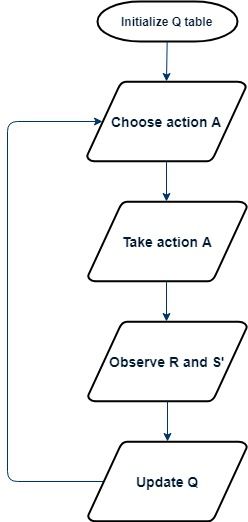

In [8]:
Image.open("./q_learning.jpg")

In [9]:
# Q-learning: Model-free, Off-policy
# Step 1: Initilize Q(State, Action)
# Start with state S
# Step 2: Choose action A from policy mu
# Step 3: Take action A
# Step 4: Observe R and S'
# Step 5: Update Q for policy pi
# Step 6: end if S' is H or G else back to step 2 to.

In [211]:
from collections import defaultdict
import numpy as np
class Policy():
    
    def __init__(self, n_action, n_state, gamma=0.95, epsilon=1, alpha=0.8, Q=None):
        self.gamma = gamma
        self.episode = 1
        self.alpha = alpha
        self.epsilon = epsilon
        self.EPS_DECAY_RATE = 0.9993
        self.n_action = n_action
        self.n_state = n_state
        # Step 1: Initilize Q(State, Action)
        if Q:
            self.Q = Q
        else:
            self.Q = dict()
            for state in range(self.n_state):
                self.Q[state] = np.zeros(4)
                
    def get_next_action(self, state, is_e_greedy=False):
        next_action = self.Q[state].argmax()
        if is_e_greedy and np.random.random() < self.epsilon:
            next_action = np.random.randint(self.n_action)
        return next_action
    
    def update_Q(self, S, A, S_prime, R):
        target = R + self.gamma * max(self.Q[S_prime])
        delta = self.alpha * (target - self.Q[S][A])
        self.Q[S][A] += delta
        

In [212]:
pi = Policy(env.action_space.n, env.observation_space.n)

In [225]:
n_episode = 30000
for episode in range(n_episode):
#     pi.episode +=1
    S = env.reset()
    done = False
    pi.epsilon *= pi.EPS_DECAY_RATE
    while not done:
        # Step 2: Choose action A from policy mu
        A = pi.get_next_action(S, True)
        # Step 3: Take action A
        # Step 4: Observe R and S'
        S_prime, R, done, info = env.step(A)
        pi.update_Q(S, A, S_prime, R)
        S = S_prime

In [226]:
# Let apply policy pi to play:
n_episode = 1000
n_win = 0
n_lose = 0
for episode in range(n_episode):
    S = env.reset()
    done = False
    while not done:
        A = pi.get_next_action(S)
        S_prime, R, done, info = env.step(A)
        S = S_prime
    if done*R == 1:
        n_win += 1
    else:
        n_lose +=1
        
n_win, n_lose, n_win / (n_lose + n_win)

(750, 250, 0.75)